#Predicción de derrames cerebrales con XGBoost Classifier

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fuente: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
data = '/content/drive/MyDrive/Data Kaggle/healthcare-dataset-stroke-data.csv'
# read la data
data = pd.read_csv(data) 
# imprimimos un resumen
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
data.apply(lambda x: len(x.unique()))

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##Imputación de valores nulos

In [ ]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(),inplace=True)

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##Visualización

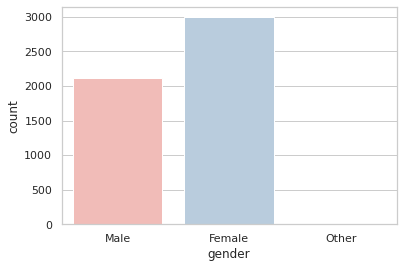

In [ ]:
sns.set_style("whitegrid")
sns.countplot(data=data, x='gender', palette = "Pastel1")

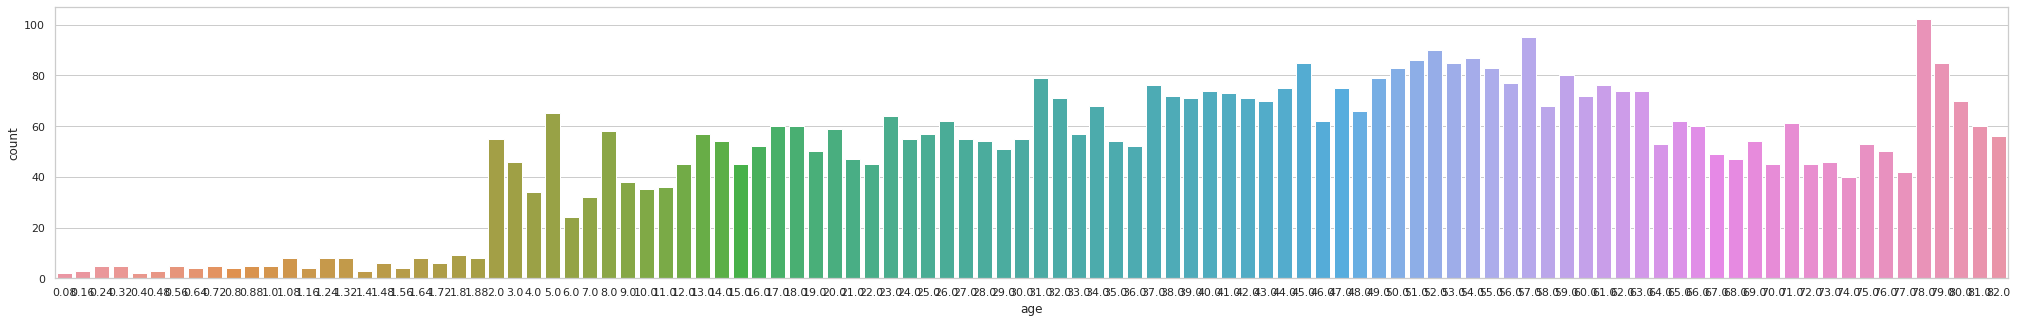

In [ ]:
plt.figure(figsize=(35,5))
sns.countplot(data=data, x='age')

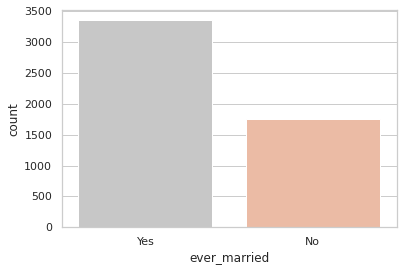

In [ ]:
sns.countplot(data=data, x='ever_married', palette="RdGy_r")

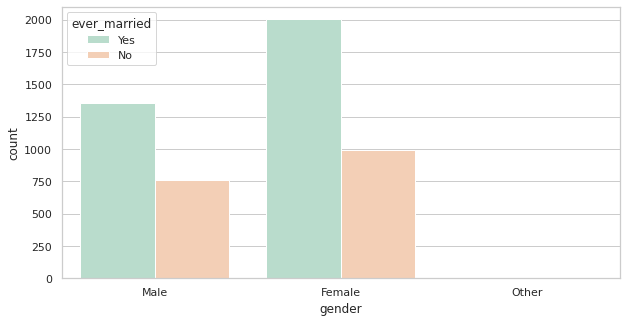

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='gender', hue='ever_married', palette='Pastel2')

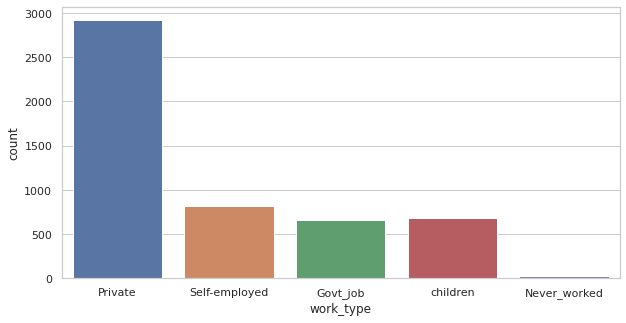

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='work_type')

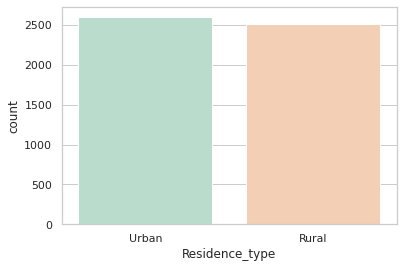

In [ ]:
sns.countplot(data=data, x='Residence_type', palette='Pastel2')

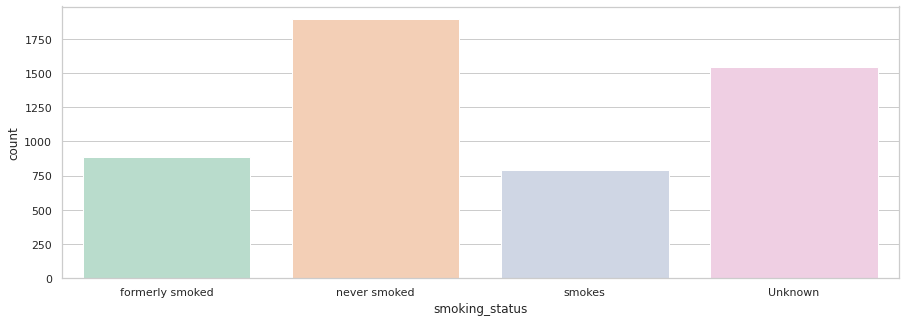

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='smoking_status', palette='Pastel2')

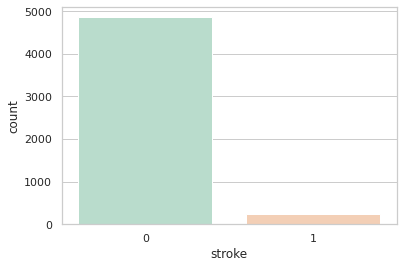

In [ ]:
sns.countplot(data=data, x='stroke', palette='Pastel2')

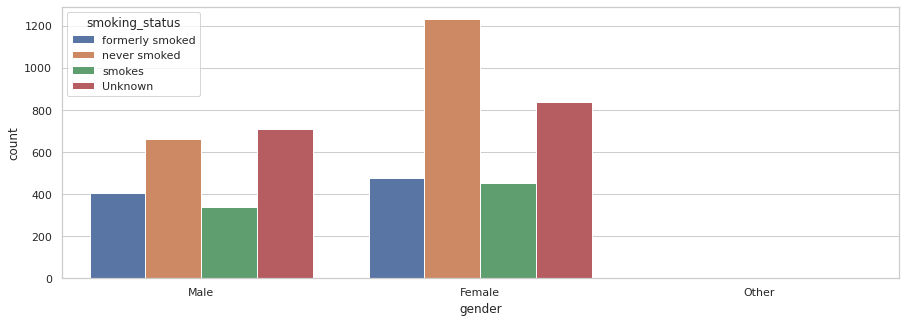

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='gender', hue='smoking_status')

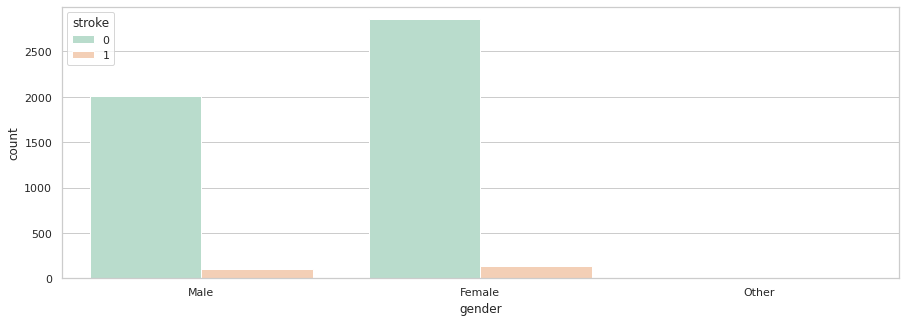

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='gender', hue='stroke', palette='Pastel2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


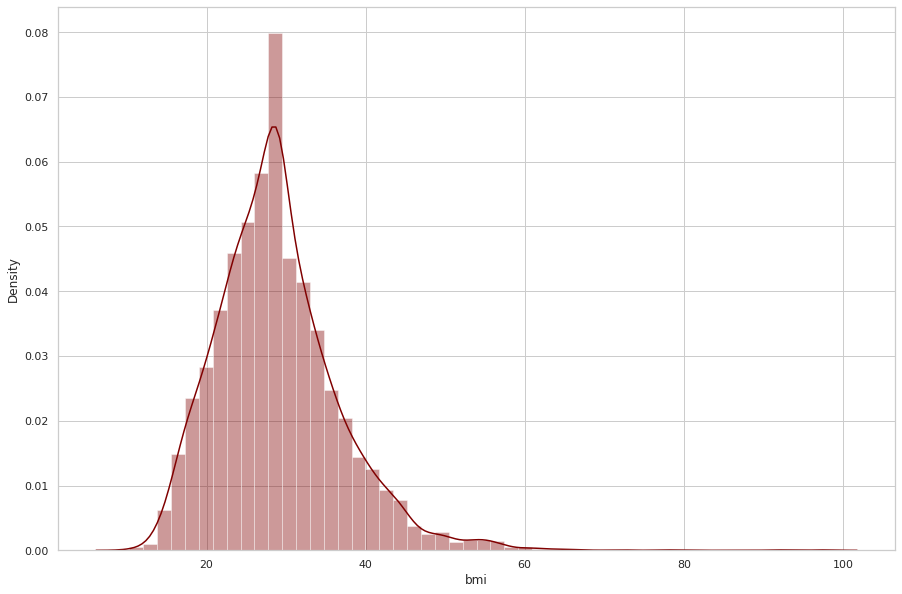

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(data.bmi, color='maroon', kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


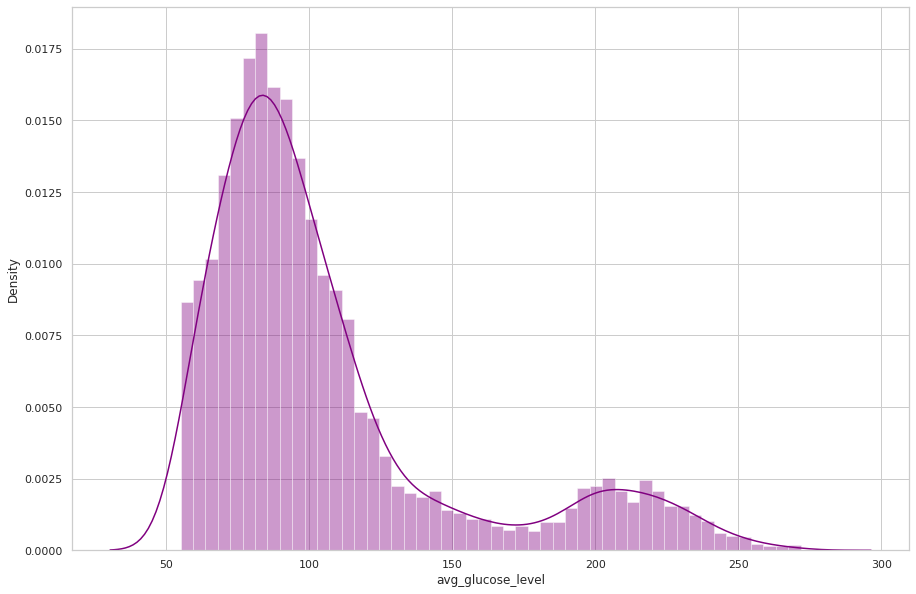

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(data.avg_glucose_level, color='purple', kde=True)
plt.show()

Text(0.5, 1.0, 'Derrames segun BMI')

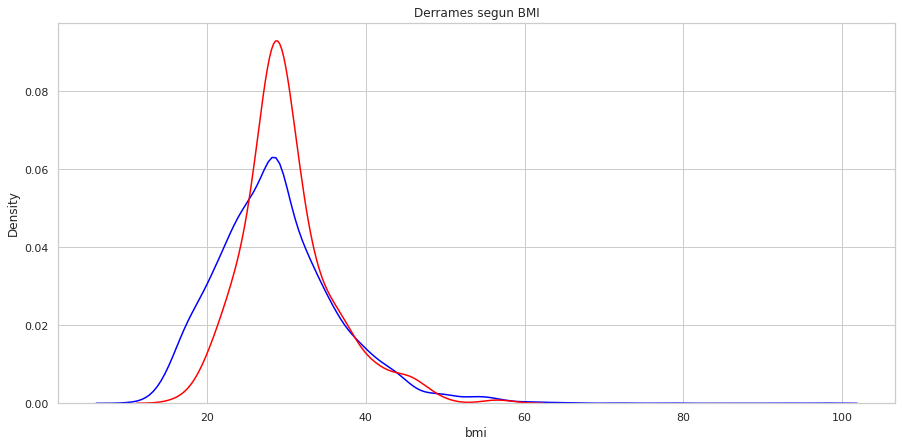

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(data[data['stroke'] == 0]['bmi'], color='blue')
sns.kdeplot(data[data['stroke'] == 1]['bmi'], color='red')

plt.title('Derrames segun BMI')

Text(0.5, 1.0, 'Derrames segun age')

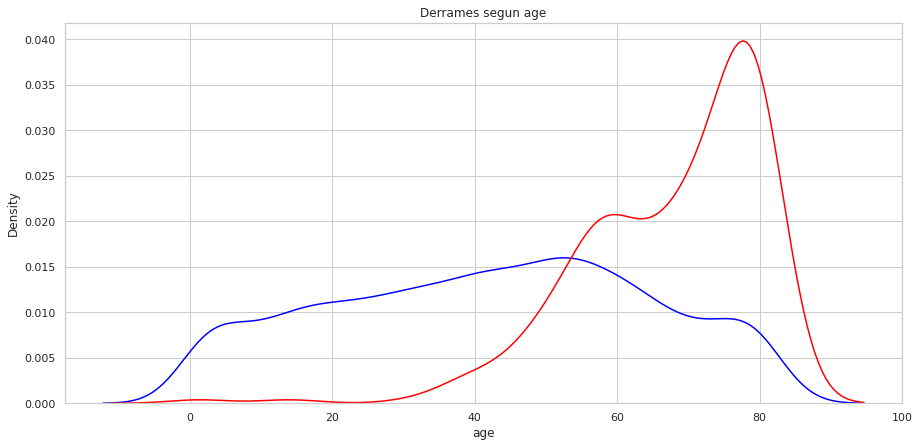

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(data[data['stroke'] == 0]['age'], color='blue')
sns.kdeplot(data[data['stroke'] == 1]['age'], color='red')

plt.title('Derrames segun age')

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Text(0.5, 1.0, 'Derrames segun avg_glucose_level')

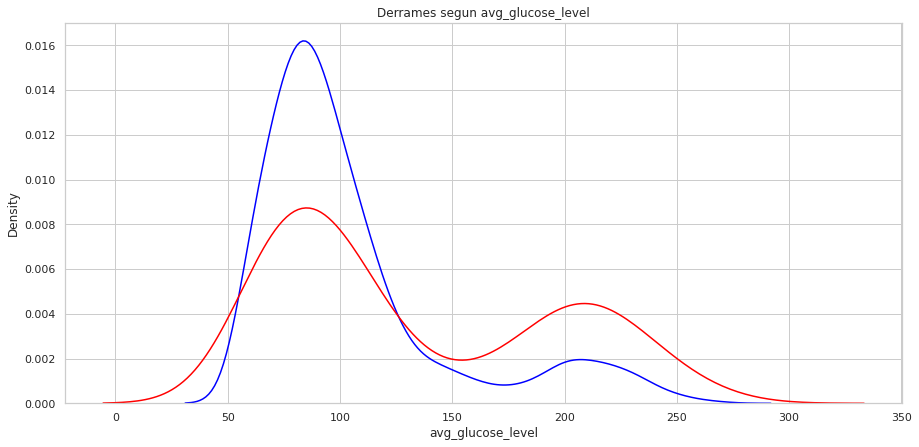

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(data[data['stroke'] == 0]['avg_glucose_level'], color='blue')
sns.kdeplot(data[data['stroke'] == 1]['avg_glucose_level'], color='red')

plt.title('Derrames segun avg_glucose_level')

Text(0.5, 1.0, 'Derrames segun hypertension')

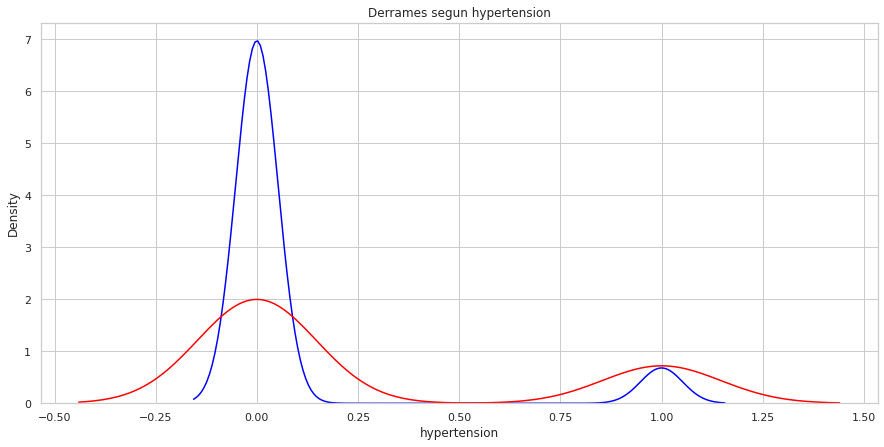

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(data[data['stroke'] == 0]['hypertension'], color='blue')
sns.kdeplot(data[data['stroke'] == 1]['hypertension'], color='red')

plt.title('Derrames segun hypertension')

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

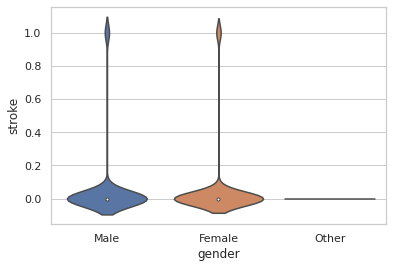

In [ ]:
sns.violinplot(data=data, x='gender', y='stroke')

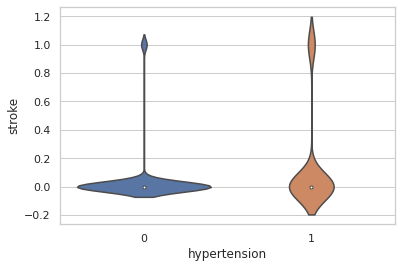

In [ ]:
sns.violinplot(data=data, x='hypertension', y='stroke')

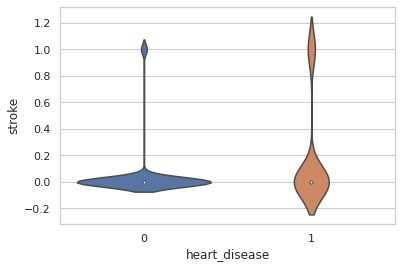

In [ ]:
sns.violinplot(data=data, x='heart_disease', y='stroke')

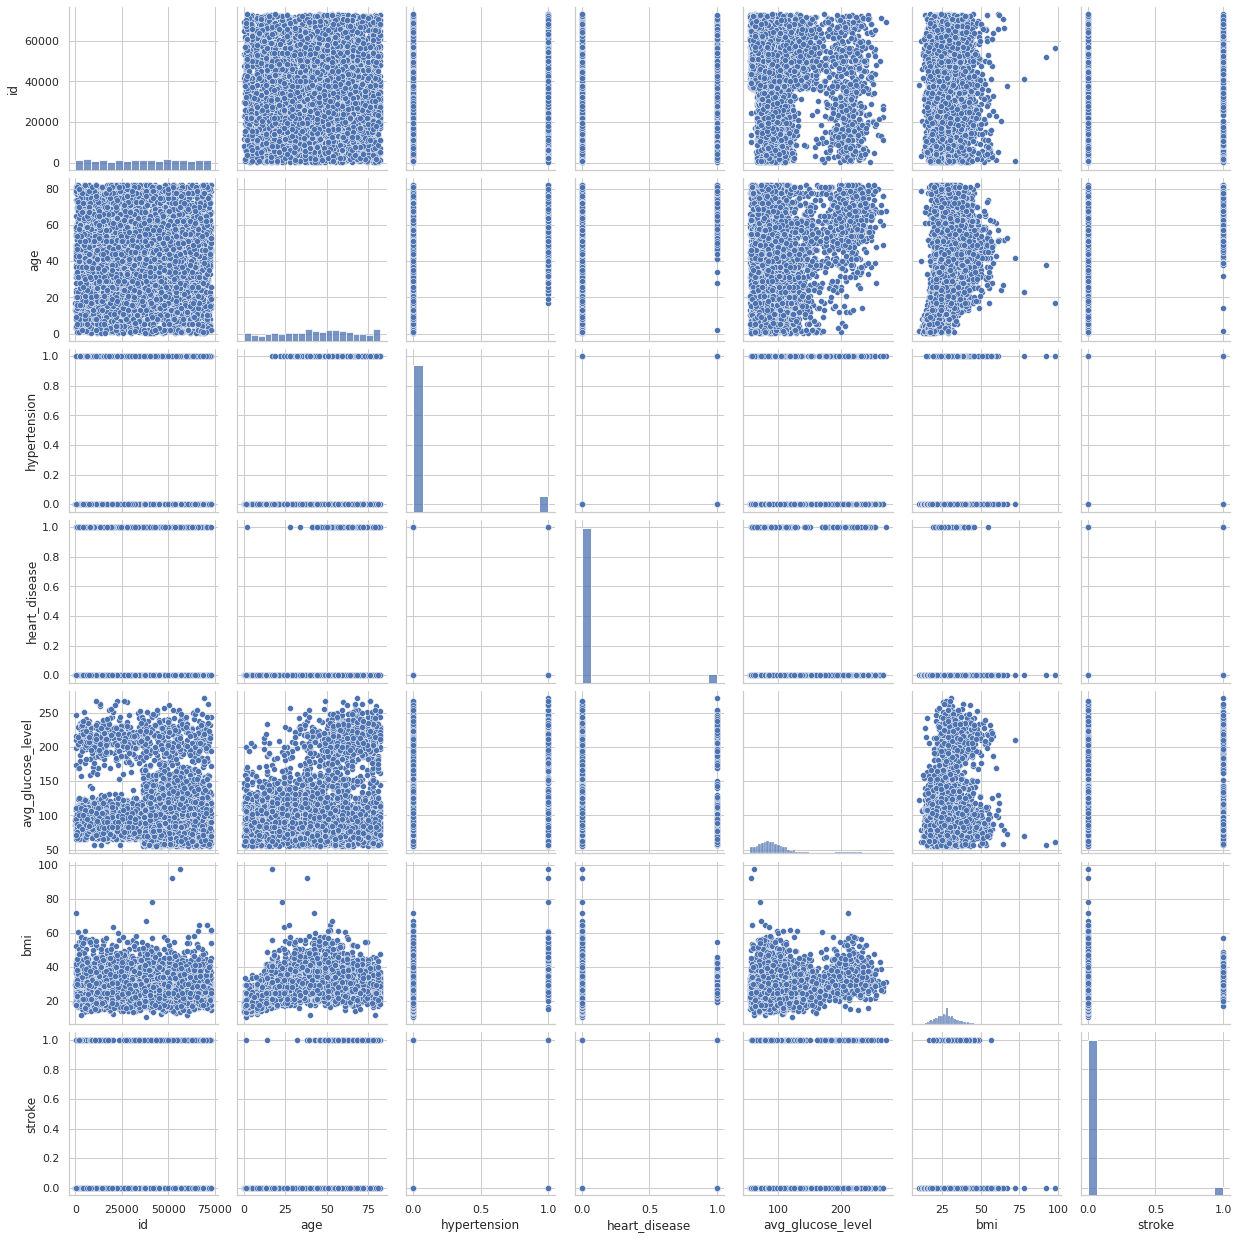

In [ ]:
sns.pairplot(data)
plt.show()

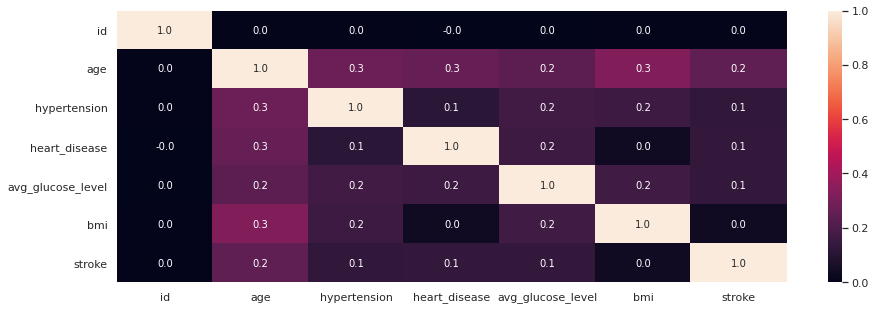

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, fmt= '.1f')
plt.show()

#Creación del modelo de predicción

In [ ]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [ ]:
y = data.stroke
X = data.drop(['stroke'], axis=1)

# Dividimos la data en entrenamiento y validación
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Seleccinamos las variables categoricas con baja cardinalidad (bajo 10)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Seleccionamos las variables numericas
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Mantenemos las columnas seleccionadas
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,28932,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,37150,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,71669,1,60.0,0,0,1,2,0,65.16,30.8,2
246,27153,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,58235,1,76.0,0,0,1,2,1,58.65,25.6,3


In [ ]:
# Preprocesamos la data numerica
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocesamos la data categorica
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Hacemos el preprocesado de ambos tipos de variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
model = XGBClassifier()

In [ ]:
# Preprocesamos y modelamos el codigo en el pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocesado del la data de entrenamiento y ajustamos el modelo 
my_pipeline.fit(X_train, y_train)

# Preprocesado del la data devalidacion, y obtener predicciones
preds = my_pipeline.predict(X_valid)

# Evaluamos el modelo
accuracy= accuracy_score(y_valid, preds)
accuracy

0.9471624266144814

#Conclusiones
Utilizando XBoost Classifier logramos obtener muy buenos resultados en la predicción de derrames cerebrales, llegando a una precisión de 94,7%